In [5]:
import numpy as np
import random
import gudhi as gd
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
import sys
sys.path.append('code')
import dmtsignal as dmt
import dmtvisual as dmtvis
import importlib
dmt = importlib.reload(dmt)
dmtvis = importlib.reload(dmtvis)

### Build a toy simplicial complex

9 points


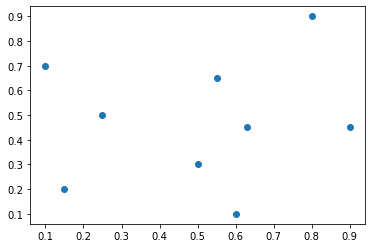

In [7]:
points=np.array([[0.15,0.2],[0.6,0.1],[0.5,0.3],[0.25,0.5],[0.63,0.45],[0.9,0.45],[0.1,0.7],[0.55,0.65],[0.8,0.9]])
n_points = points.shape[0]
print(f'{n_points} points')
plt.scatter(*points.T);

In [8]:
## Build triangle and its associate simplices
st=gd.SimplexTree()
st.insert([0,1,2])
st.insert([0,2,3])
st.insert([0,3,6])
st.insert([1,2,4])
st.insert([1,4,5])
st.insert([3,6,7])
st.insert([6,7,8])
st.insert([4,5,7])
st.insert([5,7,8])
X=dmt.extract_simplices(st)
kX=dmt.build_boundaries(X)

In [9]:
s0 = ['black']*len(X[0])#np.zeros(len(simplices[0]))
s1 =np.load("./figures/signal_toy_figures.npy")#np.random.uniform(size=len(X[1])) 
s2 =np.random.uniform(size=len(X[2]))


### Given Collpases

In [54]:
##Given Collapse
collapses=[[[0, 1], [0, 1, 2]], [[0, 2], [0, 2, 3]]]
all_X,all_collapses,all_losses,total_loss,all_signals,phispsis=dmt.sequence_given_up_collapses(X=X,kX=kX,dimq=1,signal=s1,collapses=collapses)
colX=all_X[-1]
colS=all_signals[-1]


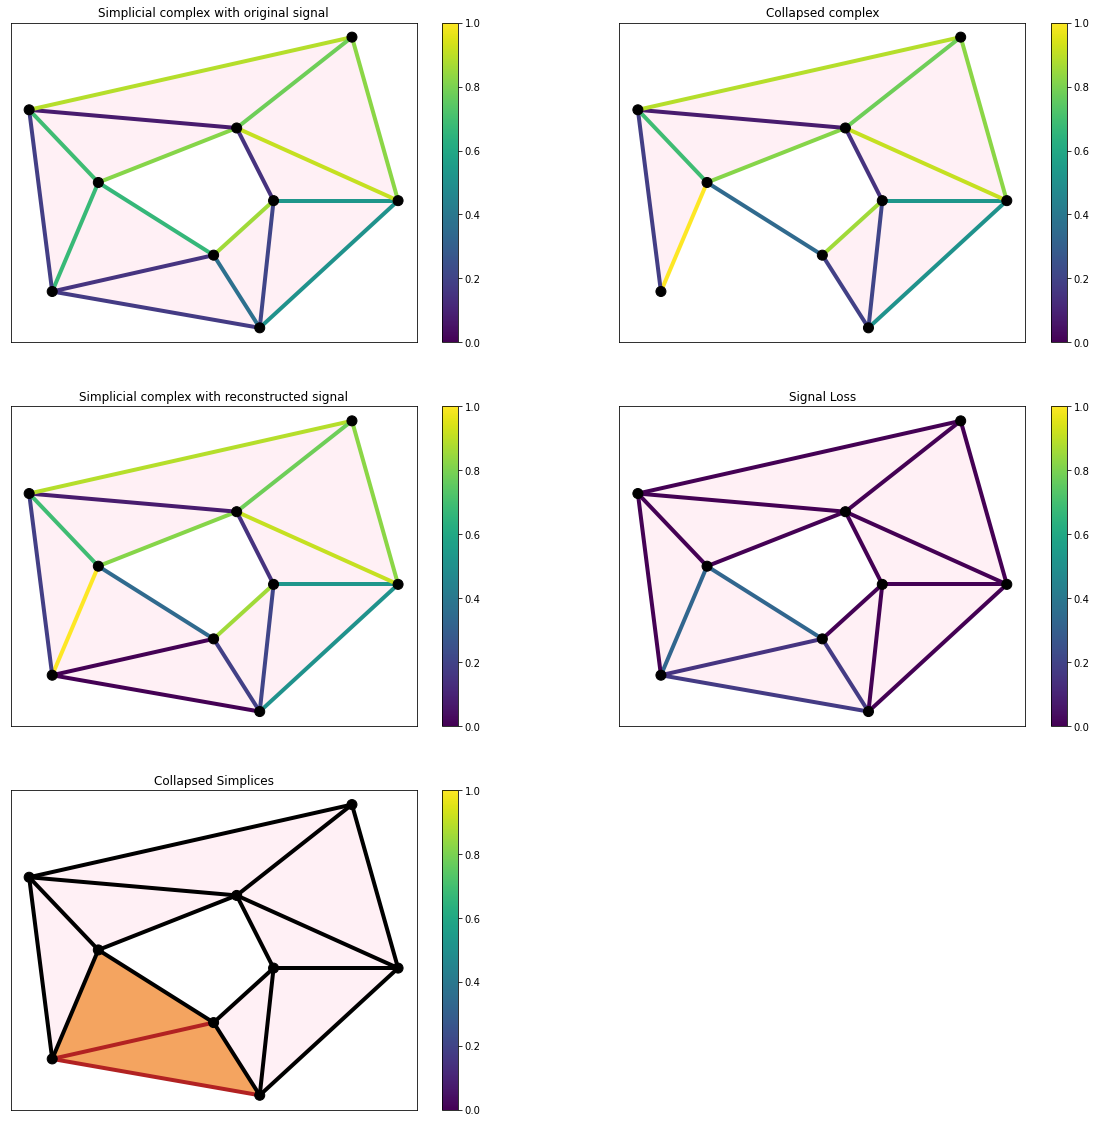

In [55]:
## Plot given collapse
dmtvis.plot_sequence_edgecollapses(X=X,dimq=1,signal=s1,collapsed_X=colX,collapsed_signal=colS,phipsis=phispsis,collapses=collapses,points=points,color_tri='lavenderblush',size_nodes=100,size_lines=4)

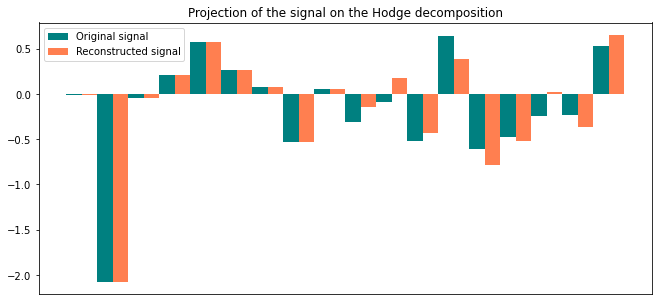

In [56]:
## Plot decomposition signal in the Hodge basis
dmtvis.plot_hodge_decomp(X,s1,kX,phispsis,trange=None,type_collapse='up')
plt.savefig('./figures/decomposition_given_collapses.pdf')

### Optimal Collapses

In [57]:
all_X_best,collapses_best,all_losses_best,total_loss_best,all_signals_best,phispsis_best= dmt.sequence_optimal_up_collapses(X=X,kX=kX,dimq=1,signal=s1,steps=2)
colX_best=all_X_best[-1]
colS_best=all_signals_best[-1]

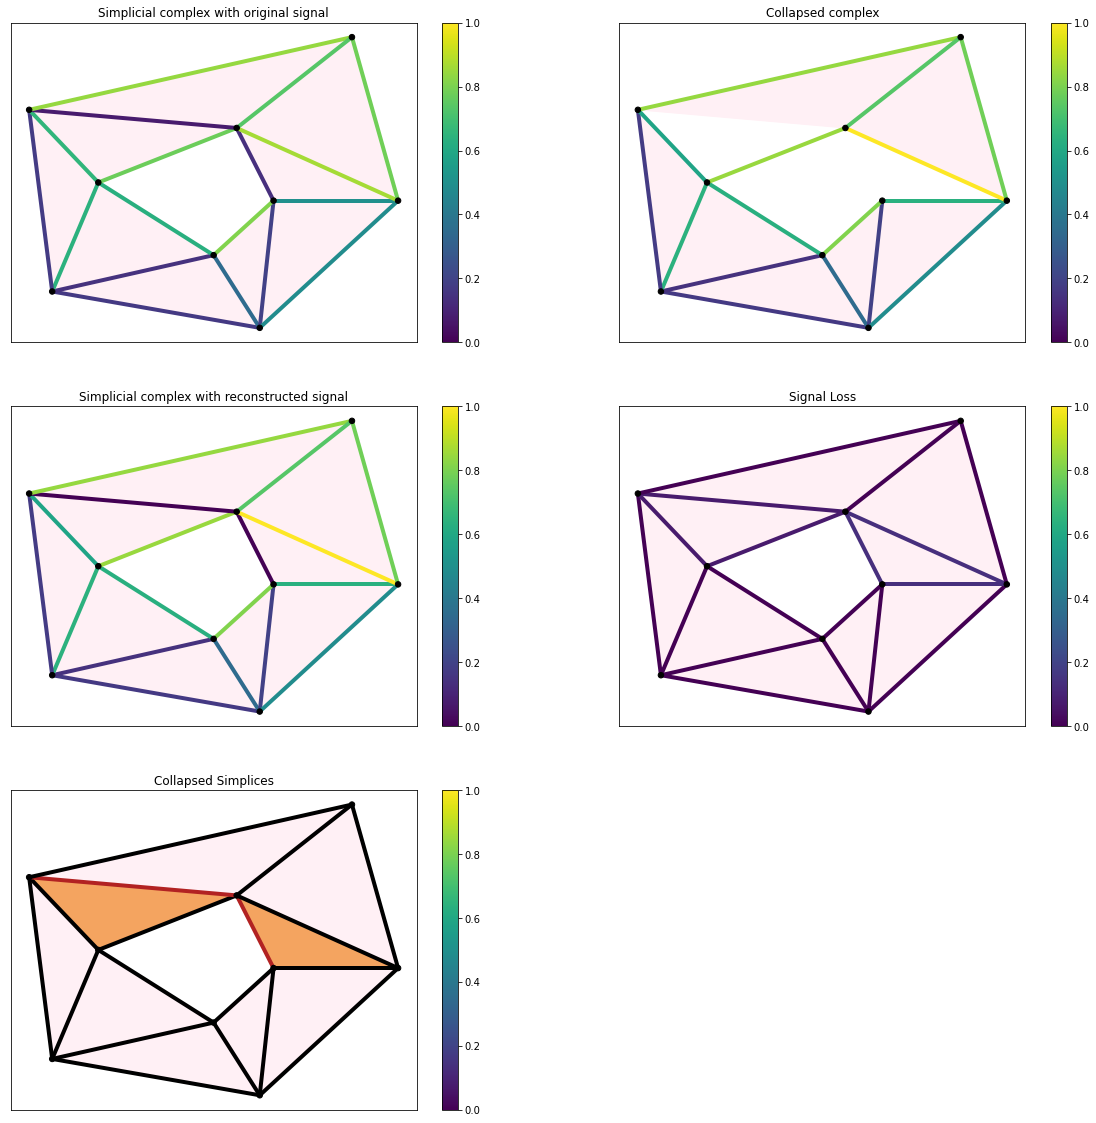

In [58]:
## plot optimal collapses normalized together with given collapses
max2,min2=dmtvis.compute_min_max(s1,phispsis_best,colS_best)
max1,min1=dmtvis.compute_min_max(s1,phispsis,colS)
tot_max=np.max([max1,max2])
tot_min=np.min([min1,min2])
dmtvis.plot_sequence_edgecollapses(X=X,dimq=1,signal=s1,collapsed_X=colX_best,collapsed_signal=colS_best,phipsis=phispsis_best,collapses=collapses_best,points=points,color_tri='lavenderblush',size_nodes=30,size_lines=4,tot_max=tot_max,tot_min=tot_min)
plt.savefig('./figures/edge_optimal_collapses.pdf')

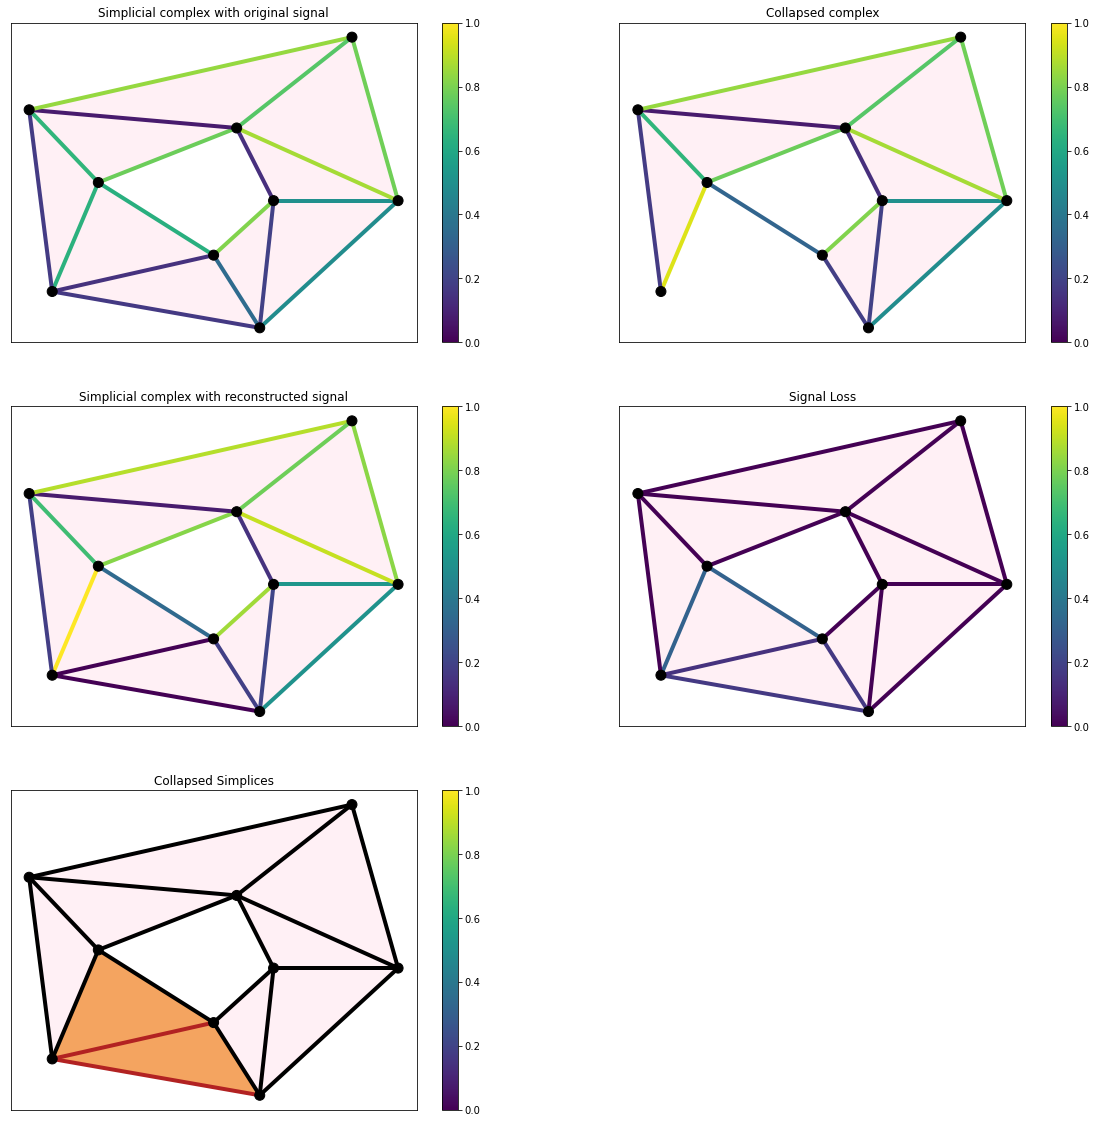

In [59]:
## plot given collapses normalized together with ptimal collapses
dmtvis.plot_sequence_edgecollapses(X=X,dimq=1,signal=s1,collapsed_X=colX,collapsed_signal=colS,phipsis=phispsis,collapses=collapses,points=points,color_tri='lavenderblush',size_nodes=100,size_lines=4,tot_max=tot_max,tot_min=tot_min)
plt.savefig('./figures/edge_given_collapses.pdf')

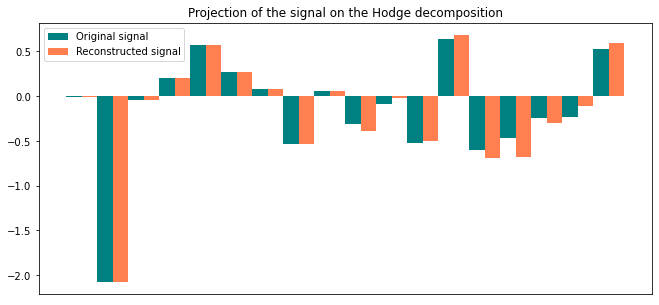

In [60]:
## Plot decomposition of the signal in the Hodge basis
dmtvis.plot_hodge_decomp(X,s1,kX,phispsis_best,trange=None,type_collapse='up')
plt.savefig('./figures/decomposition_optimal_collapses.pdf')

### Example with alpha complex

150 points


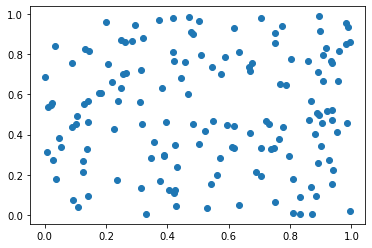

In [18]:
n_points = 150  # Approximate.
dim = 2
rs = np.random.RandomState(2882)
points = np.concatenate([
    [0.2, 1] * rs.uniform(size=(n_points//4, dim)),
    [0.2, 0.8] + [0.6, 0.2] * rs.uniform(size=(n_points//6, dim)),
    [0.2, 0] + [0.6, 0.2] * rs.uniform(size=(n_points//6, dim)),
    [0.8, 0] + [0.2, 1] * rs.uniform(size=(n_points//4, dim)),
    [0.4, 0.4] + [0.2, 0.2] * rs.uniform(size=(n_points//6, dim))
])

points = np.random.uniform(size=(n_points, dim))
#points = pg.graphs.Grid2d(10).coords

n_points = points.shape[0]
print(f'{n_points} points')

plt.scatter(*points.T);


In [19]:
ac = gd.AlphaComplex(points)
st = ac.create_simplex_tree()

before = st.num_simplices()
_ = st.prune_above_filtration(1e-2)
print(f'filtration: {before} => {st.num_simplices()} simplices')

assert st.num_vertices() == n_points
assert st.dimension() == dim

filtration: 865 => 789 simplices


In [20]:
X=dmt.extract_simplices(st)
kX=dmt.build_boundaries(X)

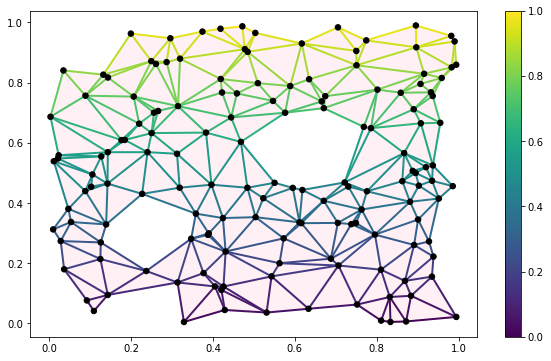

In [21]:
s0 = ['black']*len(X[0])#np.zeros(len(simplices[0]))
s1 = np.random.uniform(size=len(X[1]))
s2 =np.random.uniform(size=len(X[2]))

s1=dmtvis.height_function(X,points)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
dmtvis.plot_nodes(s0, points,ax, zorder=3,s=30)
dmtvis.plot_edges_normed(s1.copy(),points,X, ax, zorder=2,linewidths=2)
dmtvis.plot_triangles_plain('lavenderblush',points,X, ax, zorder=1)

plt.colorbar(ax.collections[0], ax=ax)

In [22]:
np.save('./figures/points.npy',points)
np.save('./figures/signal.npy',s1)
np.save('./figures/X.npy',X)
np.save('./figures/kX.npy',kX)

In [23]:
all_X,collapses,all_losses,total_loss,all_signals,phispsis= dmt.sequence_optimal_up_collapses(X=X,kX=kX,dimq=1,signal=s1,steps=100)
colX=all_X[-1]
colS=all_signals[-1]

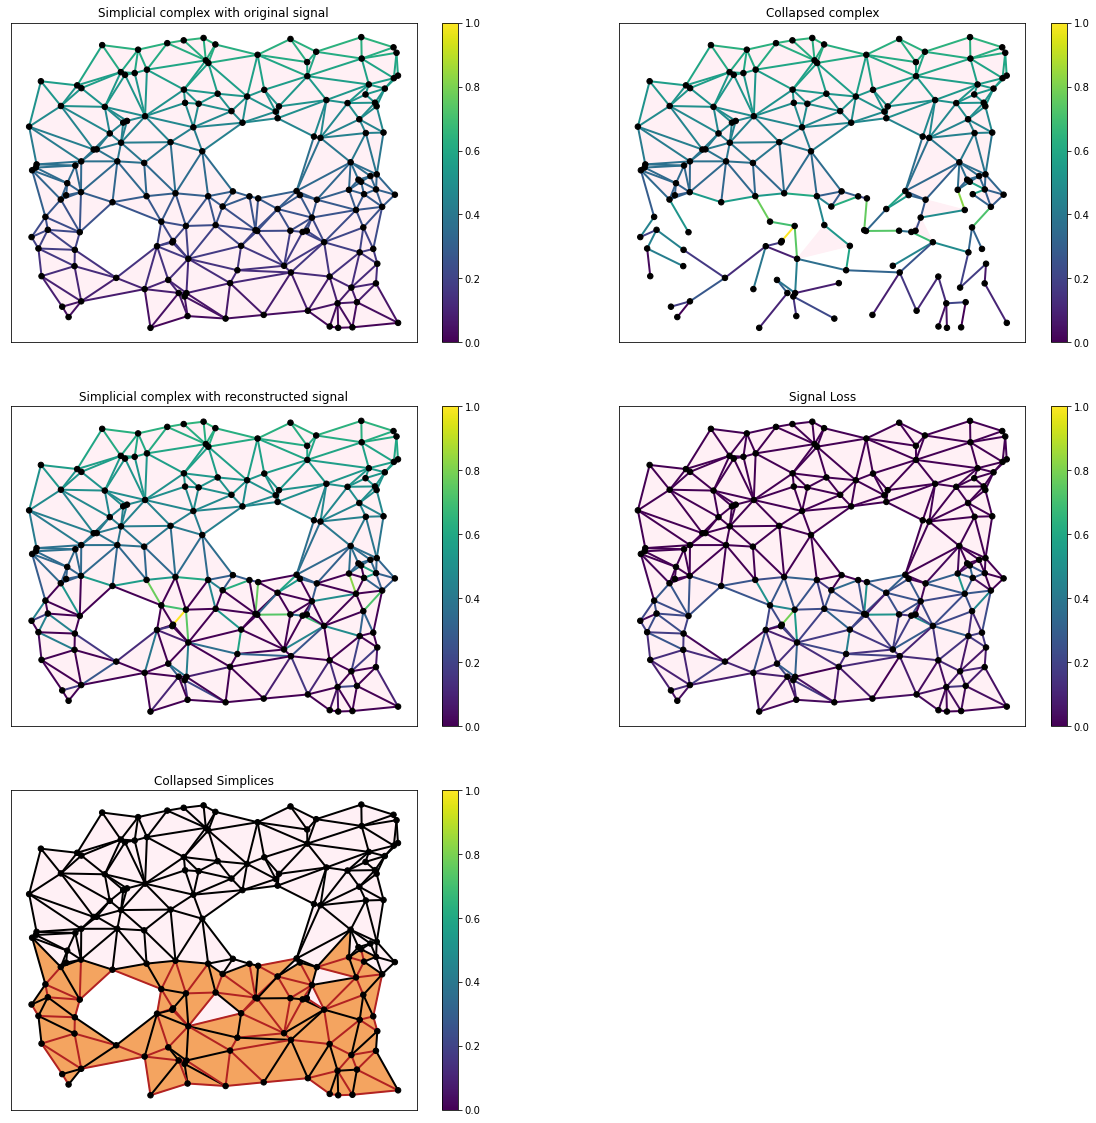

In [24]:
dmtvis.plot_sequence_edgecollapses(X=X,dimq=1,signal=s1,collapsed_X=colX,collapsed_signal=colS,phipsis=phispsis,collapses=collapses,points=points,color_tri='lavenderblush',size_nodes=30,size_lines=2)
plt.savefig('./figures/multiple_optimal_collapses.pdf')

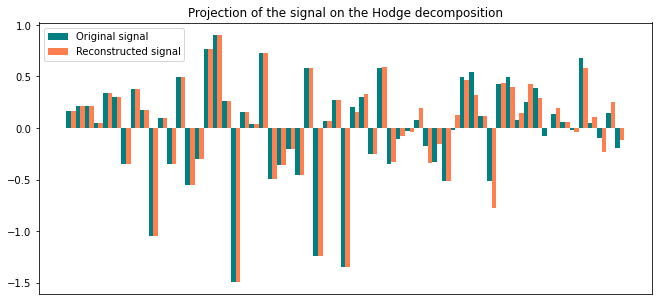

In [31]:
dmtvis.plot_hodge_decomp(X,s1,kX,phispsis,trange=30,type_collapse='up')
plt.savefig('./figures/hodge_multiple_optimal_collapses.pdf')

### Random collapses vs optimal collapses

In [26]:
all_X_rand,collapses_rand,all_losses_rand,total_loss_rand,all_signals_rand,phispsis_rand= dmt.sequence_optimal_up_collapses(X=X,kX=kX,dimq=1,signal=s1,steps=100,random=True)
colX_rand=all_X_rand[-1]
colS_rand=all_signals_rand[-1]

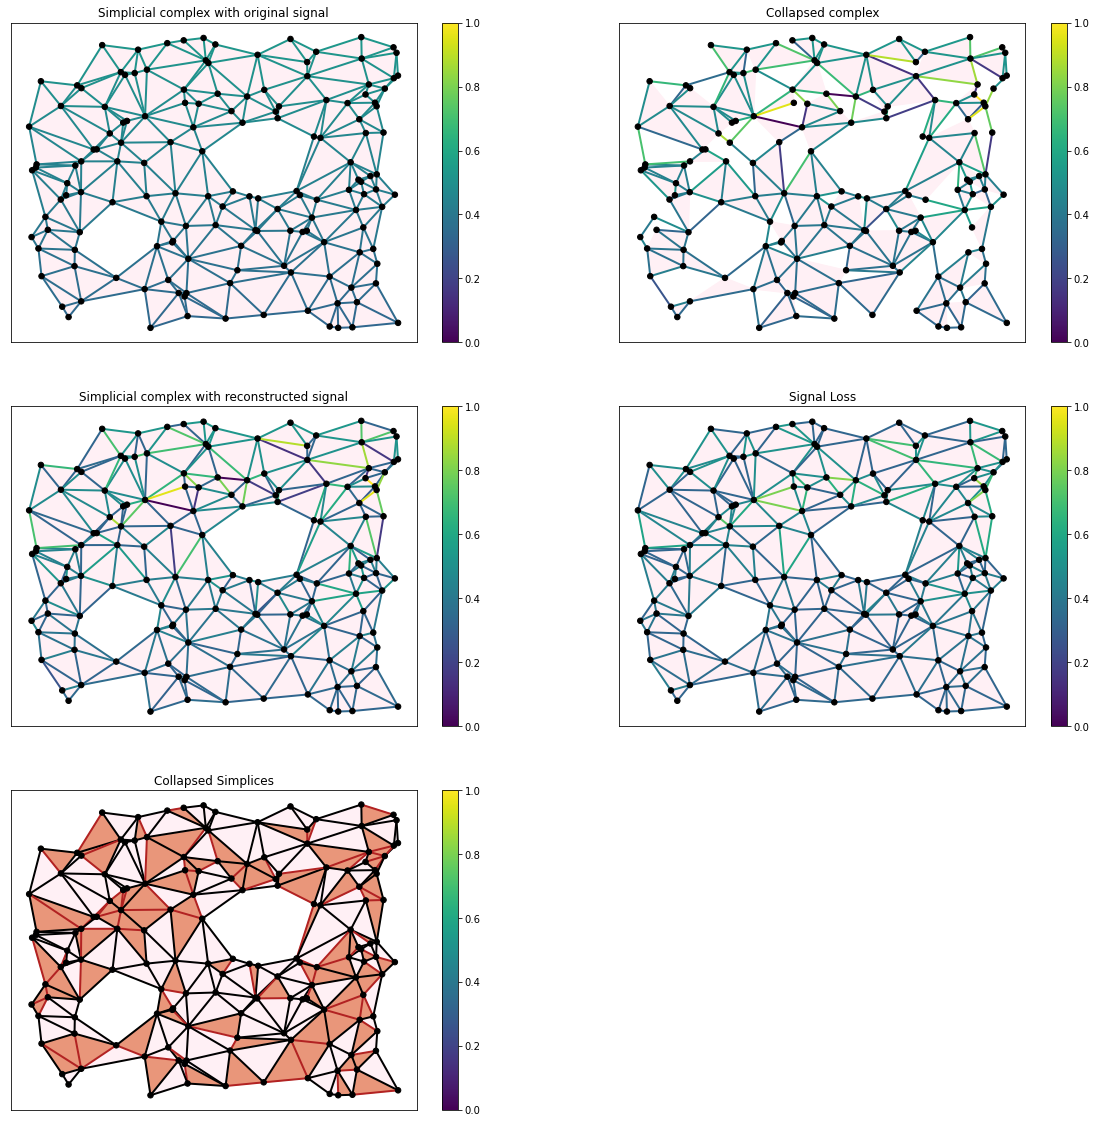

In [28]:
dmtvis.plot_sequence_edgecollapses(X=X,dimq=1,signal=s1,collapsed_X=colX_rand,collapsed_signal=colS_rand,phipsis=phispsis_rand,collapses=collapses_rand,points=points,color_tri='lavenderblush',size_nodes=30,size_lines=2)
plt.savefig('./figures/multiple_random_collapses.pdf')

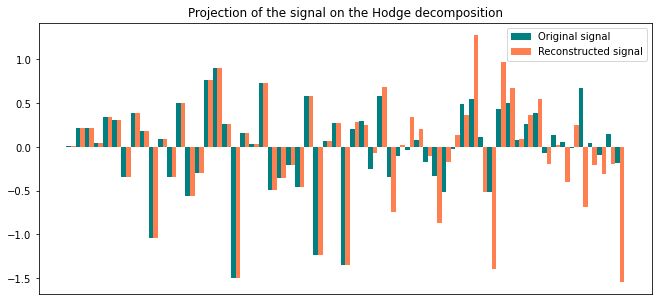

In [32]:
dmtvis.plot_hodge_decomp(X,s1,kX,phispsis_rand,trange=30,type_collapse='up')
plt.savefig('./figures/hodge_multiple_random_collapses.pdf')

### Simulating n random and optmal collapses to compare their losses

In [33]:
l=np.load('./figures/loos_optimal.npy')
rl=np.load('./figures/loos_random.npy')

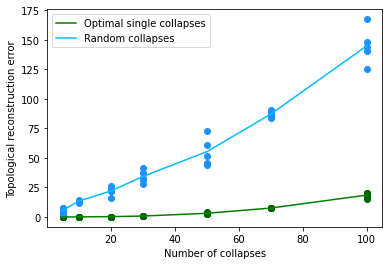

In [34]:
steps=steps=[5,10,20,30,50,70,100]
for i in range(len(l)):
    plt.scatter(steps,l[i],c='darkgreen')
plt.plot(steps,np.mean(l,axis=0),c='green',label="Optimal single collapses")
plt.plot(steps,np.mean(rl,axis=0),c='deepskyblue',label="Random collapses")
for i in range(len(l)):
    plt.scatter(steps,rl[i],c='dodgerblue')

plt.xlabel("Number of collapses")
plt.ylabel("Topological reconstruction error")
plt.legend()

In [35]:
def CI_plot_y(data, conf = .95):
    from scipy.stats import sem, t
    n = np.array(data).shape[0]
    std_err = sem(data,axis = 0)
    h = std_err * t.ppf((1 + .95) / 2, n - 1)
    return h

In [36]:
CI_plot_y(l)

array([0.00000000e+00, 0.00000000e+00, 6.91713788e-04, 8.25323548e-02,
       5.59317856e-01, 2.58554904e-01, 2.62325592e+00])

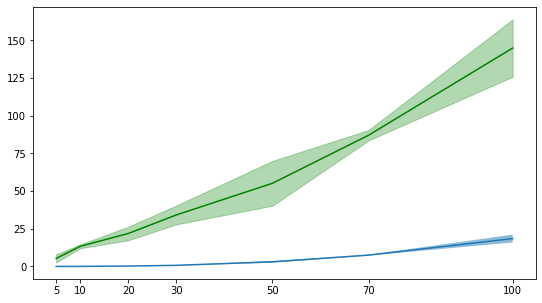

In [50]:
fig = plt.figure(figsize=(9,5))
m = np.array(l).mean(axis=0)
h = CI_plot_y(np.array(l))
plt.plot(steps,m)
plt.fill_between(steps,m-h,m+h,alpha=.5,zorder=0)

m = np.array(rl).mean(axis=0)
h = CI_plot_y(np.array(rl))
plt.plot(steps,m,c='green')
plt.fill_between(steps,m-h,m+h,alpha=.3,zorder=0,color='green')
plt.xticks(steps)
plt.savefig('./figures/topo_error.pdf')
plt.show()

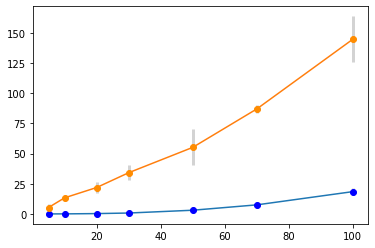

In [38]:
m = np.array(l).mean(axis=0)
h = CI_plot_y(np.array(l))
plt.plot(steps,m)
plt.errorbar(steps, m, yerr=h, fmt='o', color='blue',
             ecolor='lightgray', elinewidth=3, capsize=0);


m = np.array(rl).mean(axis=0)
h = CI_plot_y(np.array(rl))
plt.plot(steps,m)
plt.errorbar(steps, m, yerr=h, fmt='o', color='darkorange',
             ecolor='lightgray', elinewidth=3, capsize=0);
